# To Be or Not To Be (EECS-731- Assignment # 02)
---

In [16]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# modules for classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#sns.set (color_codes = True)
pd.options.mode.chained_assignment = None

# Render out plots inline
%matplotlib inline

CPU times: user 0 ns, sys: 24.5 ms, total: 24.5 ms
Wall time: 982 ms


## Dataset Loading into Pandas Frame and Viewing

In [2]:
# Load the dataset into pandas
shakespeare = pd.read_csv ("../data/Shakespeare_data.csv")
print ("# Shakespear Dataset Dimensions: ", shakespeare.shape)
shakespeare.head()

# Shakespear Dataset Dimensions:  (111396, 6)


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


## Dataset Cleaning for Empty or NaN values (dropna)

In [17]:
# Removing rows with empty or NaN fields
cl_shakespeare = shakespeare.dropna ()
print ("#Shakespear Dataset Dimensions (Without Missing Values): ", cl_shakespeare.shape)
cl_shakespeare.head ()

#Shakespear Dataset Dimensions (Without Missing Values):  (105152, 6)


,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


## Feature Extraction

In [19]:
# Splitting 'ActSceneLine' into 3 columns to have more features to play with
cl2_shake = cl_shakespeare.drop (['ActSceneLine', 'Dataline', 'PlayerLinenumber'], axis = 1)
cl2_shake.tail()

,Play,Player,PlayerLine
111390,A Winters Tale,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,A Winters Tale,LEONTES,"Lead us from hence, where we may leisurely"
111392,A Winters Tale,LEONTES,Each one demand an answer to his part
111393,A Winters Tale,LEONTES,Perform'd in this wide gap of time since first
111394,A Winters Tale,LEONTES,We were dissever'd: hastily lead away.


## A Unique Players Gist

In [5]:
cl2_shake ["Player"].unique ()[:50]

array(['KING HENRY IV', 'WESTMORELAND', 'FALSTAFF', 'PRINCE HENRY',
       'POINS', 'EARL OF WORCESTER', 'NORTHUMBERLAND', 'HOTSPUR',
       'SIR WALTER BLUNT', 'First Carrier', 'Ostler', 'Second Carrier',
       'GADSHILL', 'Chamberlain', 'BARDOLPH', 'PETO', 'First Traveller',
       'Thieves', 'Travellers', 'LADY PERCY', 'Servant', 'FRANCIS',
       'Vintner', 'Hostess', 'Sheriff', 'Carrier', 'MORTIMER',
       'GLENDOWER', 'EARL OF DOUGLAS', 'Messenger', 'VERNON', 'WORCESTER',
       'ARCHBISHOP OF YORK', 'SIR MICHAEL', 'LANCASTER', 'BEDFORD',
       'GLOUCESTER', 'EXETER', 'OF WINCHESTER', 'CHARLES', 'ALENCON',
       'REIGNIER', 'BASTARD OF ORLEANS', 'JOAN LA PUCELLE',
       'First Warder', 'Second Warder', 'WOODVILE', 'Mayor', 'Officer',
       'Boy'], dtype=object)

## Data Distribution

# Top-5 Most Referenced Players
 GLOUCESTER      1811
HAMLET          1503
IAGO            1101
FALSTAFF        1053
KING HENRY V    1029
Name: Player, dtype: int64

## Bottom-5 Most Referenced Players
 Carrier           1
Third Stranger    1
First Roman       1
Third Musician    1
Some Others       1
Name: Player, dtype: int64

Average Player Reference Count:  113
Median  Player Reference Count:  36


/home/usman/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


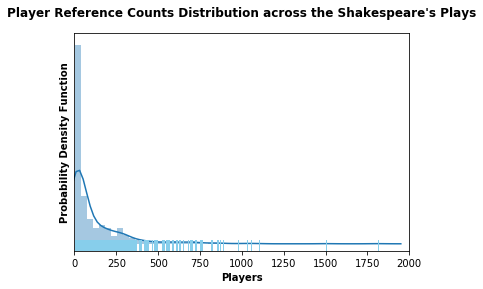

In [6]:
player_refs = cl2_shake ["Player"].value_counts ()
player_refs_mean = int (round (np.mean (player_refs)))
player_refs_median = int (np.median (player_refs))
print_limits = 5

print ("# Top-%d Most Referenced Players\n" % print_limits, player_refs [:print_limits])
print ("\n## Bottom-%d Most Referenced Players\n" % print_limits, player_refs [-print_limits:])
print ("\nAverage Player Reference Count: ", player_refs_mean)
print ("Median  Player Reference Count: ", player_refs_median)

pl_dist = sns.distplot (player_refs, rug = 'True', rug_kws = {"color": "skyblue"})
pl_dist.set_xlabel ('Players', fontweight = 'bold')
pl_dist.set_ylabel ('Probability Density Function', fontweight = 'bold')
pl_dist.set_yticks ([])
pl_dist.set_ylim ([-0.0005, 0.015])
pl_dist.set_xlim ([0, 2000])
pl_dist.set_title ("Player Reference Counts Distribution across the Shakespeare's Plays", fontweight = 'bold')
pl_dist.title.set_position([.5, 1.05])

## Dataset Balancing

In [7]:
ply_shake = cl2_shake.groupby ('Player')
filtered_shake = ply_shake.apply (lambda x: x.sample (player_refs_mean, replace = True)).reset_index (drop = True).drop_duplicates ('PlayerLine')
filtered_shake ['PlayerID'] = filtered_shake ['Player'].factorize ()[0]
print ("# Data Shape after Filtering: ", filtered_shake.shape)
print ("# A Snapshot of Filtered Data")
filtered_shake.tail ()

# Data Shape after Filtering:  (39826, 4)
# A Snapshot of Filtered Data


,Play,Player,PlayerLine,PlayerID
105435,Richard III,of young Princes,"Live, and beget a happy race of kings!",929
105436,Richard III,of young Princes,"And weigh thee down to ruin, shame, and death!",929
105442,Richard III,of young Princes,Good angels guard thee from the boar's annoy!,929
105446,Richard III,of young Princes,"Sleep, Richmond, sleep in peace, and wake in joy,",929
105448,Richard III,of young Princes,"Let us be led within thy bosom, Richard,",929


## Balanced Data Visualization

# Top-5 Most Referenced Players
 HAMLET      111
IAGO        109
OTHELLO     108
ROSALIND    108
FALSTAFF    107
Name: Player, dtype: int64

## Bottom-5 Most Referenced Players
 Knights          1
ARMADO           1
JOHN MORTIMER    1
PHRYNIA          1
MUSTARDSEED      1
Name: Player, dtype: int64

Average Player Reference Count:  113
Median  Player Reference Count:  36


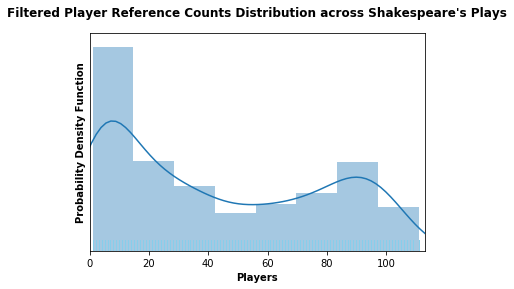

In [8]:
flt_player_refs = filtered_shake ["Player"].value_counts ()
flt_player_refs_mean = int (round (np.mean (player_refs)))
flt_player_refs_median = int (np.median (player_refs))

print ("# Top-%d Most Referenced Players\n" % print_limits, flt_player_refs [:print_limits])
print ("\n## Bottom-%d Most Referenced Players\n" % print_limits, flt_player_refs [-print_limits:])
print ("\nAverage Player Reference Count: ", flt_player_refs_mean)
print ("Median  Player Reference Count: ", flt_player_refs_median)

pl_dist = sns.distplot (flt_player_refs, rug = 'True', rug_kws = {"color": "skyblue"})
pl_dist.set_xlabel ('Players', fontweight = 'bold')
pl_dist.set_ylabel ('Probability Density Function', fontweight = 'bold')
pl_dist.set_yticks ([])
pl_dist.set_ylim ([0, 0.025])
pl_dist.set_xlim ([0, player_refs_mean])
pl_dist.set_title ("Filtered Player Reference Counts Distribution across Shakespeare's Plays", fontweight = 'bold')
pl_dist.title.set_position([.5, 1.05])

## Player Names to IDs and Vice-Versa (Dictionary)

In [9]:
player_id_df = filtered_shake [['Player', 'PlayerID']].drop_duplicates ().sort_values ('PlayerID')
player_to_id = dict (player_id_df.values)
id_to_player = dict (player_id_df [['PlayerID', 'Player']].values)
list(id_to_player.items())[:print_limits]

[(0, 'A Lord'),
 (1, 'A Patrician'),
 (2, 'A Player'),
 (3, 'AARON'),
 (4, 'ABERGAVENNY')]

## Feature Transformation

In [10]:
tfidf = TfidfVectorizer (sublinear_tf = True, min_df = 5, norm = 'l2', ngram_range = (1, 2), stop_words = 'english')
features = tfidf.fit_transform (filtered_shake.PlayerLine + filtered_shake.Play).toarray ()
labels = filtered_shake.PlayerID
features.shape

(39826, 5895)

##  Dataset Training and Testing based Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split (features, labels, test_size = 0.25, random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(29869, 5895) (29869,)
(9957, 5895) (9957,)


# CLASSIFIERS
Next, we train/test different classifiers and investigate their accuracy.

## Training and Testing Classifer # 01: Multinomial Naive Bayes

In [21]:
mnb = MultinomialNB ().fit (features, labels)

In [22]:
print ('Multinomial Naive Bayes Accuracy Score:', round (mnb.score (X_test, y_test), 3))

Multinomial Naive Bayes Accuracy Score: 0.46


Text(0, 0.5, 'Predictions')

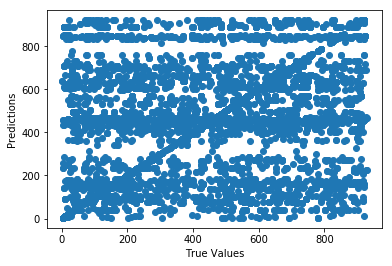

In [17]:
mnb_predict = mnb.predict (X_test)
pl_mnb = plt.scatter (y_test, mnb_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Training and Testing Classifer # 02: Linear SVC (Without any Kernel)

In [33]:
%%time
svc = LinearSVC ().fit (features, labels)

CPU times: user 43 s, sys: 50.8 ms, total: 43.1 s
Wall time: 43.2 s


In [26]:
print ('Linear SVC Score:', round (svc.score (X_test, y_test), 3))

Linear SVC Score: 0.922


Text(0, 0.5, 'Predictions')

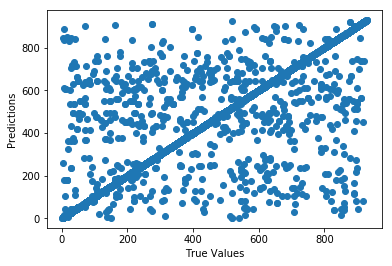

In [34]:
svc_predict = svc.predict (X_test)
pl_svc = plt.scatter (y_test, svc_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Training and Testing Classifer # 03: Logistic Regression

In [35]:
%%time
lgr = LogisticRegression ().fit (features, labels)

/home/usman/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/usman/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 1min 33s, sys: 116 ms, total: 1min 34s
Wall time: 1min 34s


In [38]:
print ('Logistic Regression based Score:', round (lgr.score (X_test, y_test), 3))

Logistic Regression based Score: 0.541


Text(0, 0.5, 'Predictions')

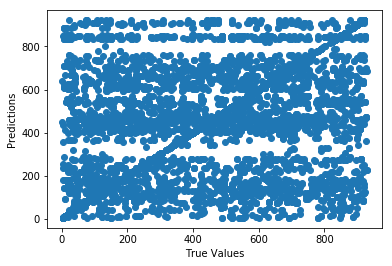

In [39]:
lgr_predict = lgr.predict (X_test)
pl_lgr = plt.scatter (y_test, lgr_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Training and Testing Classifer # 04: Random Forest

In [12]:
%%time
rfc = RandomForestClassifier (random_state = 0).fit(features, labels)

/home/usman/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 38.4 s, sys: 4.5 s, total: 42.9 s
Wall time: 2min 32s


In [13]:
print ('Random Forest  Classifier Accuracy Score:', round (rfc.score (X_test, y_test), 3))

Random Forest  Classifier Accuracy Score: 0.937


Text(0, 0.5, 'Predictions')

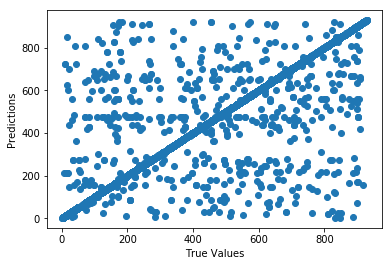

In [14]:
rfc_predict = rfc.predict (X_test)
pl_rfc = plt.scatter (y_test, rfc_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Conclusion

First, we pre-processed and balanced the given Shakespeare dataset. Then, we analyzed four major machine learning classifiers to classify correct Players label. Out of four tested classifiers, Random Forest based classifier outperformed other methods with best accuracy of 93.7%. One reason of Random Forest, being the best, is their property of ensembleness as final classifiation score is not based on just one Decision Tree, but from several Decision Trees  using majority voting mechanism. They are also less prone to over-fitting/high-variance as each tree learns to predict differently.